In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
DatetimeIndex(['2022-10-07', '2022-10-10', '2022-10-12', '2022-12-22',
               '2022-12-23', '2022-12-27', '2022-12-28', '2023-01-03',
               '2023-01-27', '2023-01-31', '2023-02-02', '2023-02-03',
               '2023-06-01', '2023-06-02', '2023-06-05', '2023-06-06',
               '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-12',
               '2023-06-13', '2023-06-14'],
              dtype='datetime64[ns]', name='Date', freq=None)


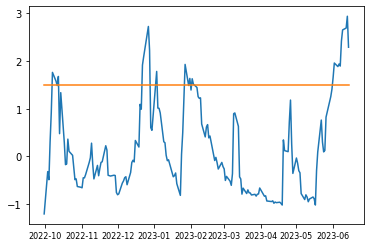

In [17]:
ticker = "TSLA"
start = '2022-09-01'
end = '2023-06-15'
prices = yf.download(ticker, start, end)['Close']
r0 = int(len(prices) * 0.1)
#lag for augmented dicky-fuller(ADF) test
adf_lags = 3
#critical value of the right tailed adf test (95%)
crit = 1.49
#transforming data
log_prices = np.array(np.log(prices))
delta_log_prices = log_prices[1:] - log_prices[:-1]
n = len(delta_log_prices)

BSADF = np.array([])
for r2 in range(r0,n):
    ADFS = np.array([])
    for r1 in range(0,r2-r0+1):
        x0 = log_prices[r1 : r2+1]
        x = pd.DataFrame()
        x[0] = x0
        for j in range(1,adf_lags+1):
            x[j] = np.append(np.zeros(j), delta_log_prices[r1:r2+1-j])
        x = np.array(x)
        y = delta_log_prices[r1:r2+1]
        reg = sm.OLS(y,sm.add_constant(x))
        res = reg.fit()
        ADFS = np.append(ADFS, res.params[1]/res.bse[1])
    BSADF = np.append(BSADF, max(ADFS))
    
plt.rc('xtick', labelsize = 8)
plt.plot(prices.index[r0+1:], BSADF)
plt.plot(prices.index[r0+1:], np.ones(len(BSADF))*crit)
#print dates when bubbles
print(prices.index[r0+1:][BSADF > crit])    